In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./tweets.csv', sep='\t', error_bad_lines=False, header=None)

FileNotFoundError: [Errno 2] File b'./tweets.csv' does not exist: b'./tweets.csv'

In [98]:
f = open("/home/kripa/Desktop/echo-chambers/garimella-impl/data/obamacare/userinfo.txt", "r")

userIDList = []
userData = f.readlines()
userTweets = {}

for user in userData:
    userID= user.split("\t", 2)
    if userID[0].isnumeric():
        userIDList.append(userID[0])
        userTweets[userID[0]] = []      


In [99]:
dom = open("/home/kripa/Desktop/echo-chambers/garimella-impl/data/domains_ideology_score_LADA.txt", "r")
dlist = dom.readlines()

domName = []
domScore = []

for d in dlist:
    dd = d.split("\t")
    domName.append(dd[0])
    domScore.append(dd[1][:-2])
    

In [115]:
# print (len(domScore))

userScore = {}

for i in range(len(df)):
    urls = str(df[9][i])
    userID = df[0][i]
    tweetID = df[1][i]
    tweet = df[2][i]

    if urls == "nan" or urls == "NaN":
        continue
    x = -1
    score = 0.5
#     print (urls)
    for j in range(len(domName)):
        if urls.find(domName[j]) != -1 or urls.find(domName[j][:-4]) != -1:
            x = 1
            score = domScore[j]
            break

    if x != -1:
        userTweets[str(userID)].append([tweetID, score])
#         print (userID)
#         print (userTweets[userID])
        

In [121]:
print (len(userTweets))

ind_score = []
for userID in userTweets:
#     print (userID)
    l = len(userTweets[userID])
    if l == 0:
        continue
    total = 0
    for x in range(l):
        total += float(userTweets[userID][x][1]) 
#         print (total)
#     total = sum(userTweets[userID][1])
    userScore[userID] = total/l
    ind_score.append(total/l)


8773


In [125]:
# print (userScore)

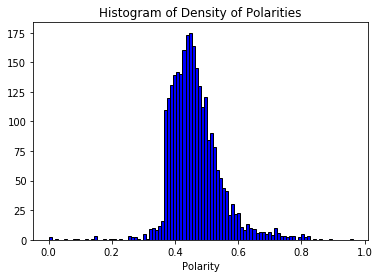

In [124]:
#plot on scatterplot

import numpy as np
import matplotlib.pyplot as plt

# print (len(userScore))

# matplotlib histogram
plt.hist(ind_score, color = 'blue', edgecolor = 'black', bins = int(1/0.01))

# Add labels
plt.title('Histogram of Density of Polarities')
plt.xlabel('Polarity')

plt.show()
# plt.ylabel('Flights')